In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv("adult_with_headers.csv")
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 1. Data Exploration and Preprocessing:

In [4]:
df.info()#describing the type of the each column value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe(include="all") #mean and median for all the numerical columns

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [6]:
df.select_dtypes(include=["object"]).mode()#mode for all the object columns

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K


In [7]:
#	Handle missing values as per the best practices (imputation, removal, etc.).
df.isnull().sum()
#since there are no missing values so no need of imputation

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
#•	Apply scaling techniques to numerical features:
x=df.select_dtypes(include=["number"])
x#selecting only number columns

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [9]:
#standardizing all the number columns
#standard scaler
sdscalerx=StandardScaler()
df_standardized=pd.DataFrame(sdscalerx.fit_transform(x),columns=x.columns)
df_standardized

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [10]:
#min max scaling
scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
df_scaled

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


## 2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [12]:
#apply the encoding techniques like Label Encoding

from sklearn.preprocessing import LabelEncoder


categorical_cols = df.select_dtypes(include='object').columns.drop('income', errors='ignore')

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"Column '{col}' encoded using Label Encoding.")

df.head()

Column 'workclass' encoded using Label Encoding.
Column 'education' encoded using Label Encoding.
Column 'marital_status' encoded using Label Encoding.
Column 'occupation' encoded using Label Encoding.
Column 'relationship' encoded using Label Encoding.
Column 'race' encoded using Label Encoding.
Column 'sex' encoded using Label Encoding.
Column 'native_country' encoded using Label Encoding.


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [13]:
# apply one hot encoding on the data

# Identify categorical columns with less than 5 unique categories
categorical_cols_onehot = [col for col in df.select_dtypes(include='object').columns if df[col].nunique() < 5 and col != 'income']

# Apply One-Hot Encoding to the identified columns
df = pd.get_dummies(df, columns=categorical_cols_onehot, drop_first=True)

print("One-Hot Encoding applied to columns:", categorical_cols_onehot)

df.head()

One-Hot Encoding applied to columns: []


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [14]:
#discussing the pros and cons of transformation
print("\nDiscussion on Encoding Techniques:")
print("\nOne-Hot Encoding:")
print("Pros:")
print("- Represents categorical data as binary vectors, avoiding implied order.")
print("- Suitable for nominal categorical variables where there is no inherent ranking.")
print("Cons:")
print("- Can lead to high-dimensional data (curse of dimensionality) if there are many unique categories.")
print("- Can increase memory usage and computation time.")

print("\nLabel Encoding:")
print("Pros:")
print("- Simple and efficient for encoding categorical data into numerical form.")
print("- Reduces the number of features compared to One-Hot Encoding.")
print("Cons:")
print("- Introduces an arbitrary numerical order, which can be misinterpreted by algorithms as a ranking.")
print("- Not suitable for nominal categorical variables; best used for ordinal variables where order matters.")


Discussion on Encoding Techniques:

One-Hot Encoding:
Pros:
- Represents categorical data as binary vectors, avoiding implied order.
- Suitable for nominal categorical variables where there is no inherent ranking.
Cons:
- Can lead to high-dimensional data (curse of dimensionality) if there are many unique categories.
- Can increase memory usage and computation time.

Label Encoding:
Pros:
- Simple and efficient for encoding categorical data into numerical form.
- Reduces the number of features compared to One-Hot Encoding.
Cons:
- Introduces an arbitrary numerical order, which can be misinterpreted by algorithms as a ranking.
- Not suitable for nominal categorical variables; best used for ordinal variables where order matters.


In [15]:
#getting only the categorical column fromthe dataset

original_numerical_cols = x.columns.tolist()
all_cols = df.columns.tolist()
transformed_categorical_cols = [col for col in all_cols if col not in original_numerical_cols and col != 'income']

x = df[transformed_categorical_cols]
x.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,7,9,4,1,1,4,1,39
1,6,9,2,4,0,4,1,39
2,4,11,0,6,1,4,1,39
3,4,1,2,6,0,2,1,39
4,4,9,2,10,5,2,0,5


In [31]:
df_new=pd.concat([df_standardized,x],axis=1)
df_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   fnlwgt          32561 non-null  float64
 2   education_num   32561 non-null  float64
 3   capital_gain    32561 non-null  float64
 4   capital_loss    32561 non-null  float64
 5   hours_per_week  32561 non-null  float64
 6   workclass       32561 non-null  int32  
 7   education       32561 non-null  int32  
 8   marital_status  32561 non-null  int32  
 9   occupation      32561 non-null  int32  
 10  relationship    32561 non-null  int32  
 11  race            32561 non-null  int32  
 12  sex             32561 non-null  int32  
 13  native_country  32561 non-null  int32  
dtypes: float64(6), int32(8)
memory usage: 2.5 MB


In [35]:
#all the columns are transformed

## 3. Feature Engineering:
• Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

• Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [38]:
#Create at least 2 new features that could be beneficial for the model

# Feature 1: 'hours_per_week_group' - Categorize hours worked per week
# Instead of treating hours per week as a continuous variable, grouping it into categories might capture non-linear relationships or identify specific work
# patterns (e.g., part-time, full-time, over-time) that are more predictive of income.We can use quantiles or predefined ranges to create these groups.


df_new['hours_per_week_group'] = pd.cut(df_new['hours_per_week'], bins=5, labels=False)

# Feature 2: 'education_occupation_interaction' - Interaction between education and occupation The combination of education level and occupation might be a stronger
# predictor of income than either feature alone. For example, someone with a higher education in a high-paying occupation is likely to earn more than someone with the
# same education in a lower-paying job, or someone with a lower education in the same high-paying job. This feature captures this interaction.
# We can create this by multiplying or concatenating the encoded education and occupation columns.

df_new['education_occupation_interaction'] = df_new['education_num'] * df_new['occupation']

print("New features created: 'hours_per_week_group' and 'education_occupation_interaction'")
print(df_new[['hours_per_week', 'hours_per_week_group', 'education_num', 'occupation', 'education_occupation_interaction']].head())

New features created: 'hours_per_week_group' and 'education_occupation_interaction'
   hours_per_week  hours_per_week_group  education_num  occupation  \
0       -0.035429                     1       1.134739           1   
1       -2.222153                     0       1.134739           4   
2       -0.035429                     1      -0.420060           6   
3       -0.035429                     1      -1.197459           6   
4       -0.035429                     1       1.134739          10   

   education_occupation_interaction  
0                          1.134739  
1                          4.538955  
2                         -2.520358  
3                         -7.184753  
4                         11.347388  


In [40]:
# Apply log transformation to a skewed numerical feature
# First, identify a potentially skewed numerical feature. 'capital_gain' and 'capital_loss'
# are often highly skewed in income datasets. Let's check 'capital_gain'.
# We need to handle potential zero values before applying log transformation by adding a small constant.

numerical_cols_in_new_df = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Check skewness of numerical columns
skewness = df_new[numerical_cols_in_new_df].skew()
print("\nSkewness of numerical features:\n", skewness)

# 'capital_gain' and 'capital_loss' are highly skewed. Let's apply log transformation to 'capital_gain'.
# We need to add 1 to handle zero values (log(0) is undefined).
df_new['capital_gain_log'] = np.log1p(df_new['capital_gain']) # log1p(x) is log(1+x)

print("\n'capital_gain' feature transformed using log1p.")
print(df_new[['capital_gain', 'capital_gain_log']].head())

# Justification for log transformation:
print("\nJustification for log transformation on 'capital_gain':")
print("The 'capital_gain' feature often has a highly skewed distribution with a large number of zero values and a few very large values.")
print("Log transformation (specifically log1p) can help in several ways:")
print("1. It reduces the skewness of the distribution, making it more symmetric (closer to normal).")
print("2. It compresses the range of values, reducing the impact of extreme values (outliers).")
print("3. Many machine learning models assume or perform better with normally distributed or less skewed data.")
print("4. The log1p transformation is used instead of simple log to handle zero values gracefully, as log(0) is undefined, while log(1+0) = log(1) = 0.")
print("This transformation can improve model performance, especially for models sensitive to skewed distributions like linear models or neural networks.")


Skewness of numerical features:
 age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

'capital_gain' feature transformed using log1p.
   capital_gain  capital_gain_log
0      0.148453          0.138416
1     -0.145920         -0.157731
2     -0.145920         -0.157731
3     -0.145920         -0.157731
4     -0.145920         -0.157731

Justification for log transformation on 'capital_gain':
The 'capital_gain' feature often has a highly skewed distribution with a large number of zero values and a few very large values.
Log transformation (specifically log1p) can help in several ways:
1. It reduces the skewness of the distribution, making it more symmetric (closer to normal).
2. It compresses the range of values, reducing the impact of extreme values (outliers).
3. Many machine learning models assume or perform better with normally distributed or less skewe


## Feature Selection:
• Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
• Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [45]:
#Use the Isolation Forest algorithm to identify and remove outliers.

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination='auto', random_state=42)

df_new['outlier_prediction'] = iso_forest.fit_predict(df_new)

print(df_new['outlier_prediction'].value_counts())
print()

# Filter out the outliers (rows where prediction is -1)
df_cleaned = df_new[df_new['outlier_prediction'] == 1].drop('outlier_prediction', axis=1)

print(f"Original number of rows: {df_new.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")
print(f"Number of outliers removed: {df_new.shape[0] - df_cleaned.shape[0]}")

outlier_prediction
 1    28935
-1     3626
Name: count, dtype: int64

Original number of rows: 32561
Number of rows after removing outliers: 28935
Number of outliers removed: 3626


In [47]:
# Discussion on how outliers affect model performance
print("\nDiscussion on how outliers can affect model performance:")
print("Outliers are data points that significantly deviate from the general trend or distribution of the data.")
print("Their presence can negatively impact model performance in several ways:")
print("1. Sensitive to Distance-Based Algorithms: Algorithms like K-Means, K-Nearest Neighbors, and Support Vector Machines (SVMs) that rely on distance calculations are highly sensitive to outliers, as they can pull centroids, decision boundaries, or nearest neighbors towards them, leading to inaccurate models.")
print("2. Skewing Statistical Measures: Outliers can heavily influence mean, standard deviation, and variance. This can lead to misinterpretations of the data's central tendency and variability, affecting algorithms that rely on these statistics (e.g., Linear Regression).")
print("3. Violating Assumptions: Many parametric models (like Linear Regression) assume that errors are normally distributed. Outliers can violate this assumption, leading to biased or inconsistent parameter estimates.")
print("4. Affecting Model Fitting: In models like Linear Regression, outliers can pull the regression line away from the majority of the data, resulting in a poor fit and reduced predictive accuracy.")
print("5. Overfitting or Underfitting: Depending on the model and the nature of the outliers, they can sometimes cause models to overfit to the noisy data points or underfit the general pattern.")
print("Removing or treating outliers can lead to more robust models that generalize better to unseen data and provide more reliable predictions.")


Discussion on how outliers can affect model performance:
Outliers are data points that significantly deviate from the general trend or distribution of the data.
Their presence can negatively impact model performance in several ways:
1. Sensitive to Distance-Based Algorithms: Algorithms like K-Means, K-Nearest Neighbors, and Support Vector Machines (SVMs) that rely on distance calculations are highly sensitive to outliers, as they can pull centroids, decision boundaries, or nearest neighbors towards them, leading to inaccurate models.
2. Skewing Statistical Measures: Outliers can heavily influence mean, standard deviation, and variance. This can lead to misinterpretations of the data's central tendency and variability, affecting algorithms that rely on these statistics (e.g., Linear Regression).
3. Violating Assumptions: Many parametric models (like Linear Regression) assume that errors are normally distributed. Outliers can violate this assumption, leading to biased or inconsistent pa

## Note:PPS is not working in Jupyter

In [50]:
#!pip install ppscore

In [52]:
#==> when apply the ppscore the pandas and numpy panadas are getting collapsed and the jupyter note book is not working
#==>these code is for the pps core if your system supports you can execute 


Discussion of PPS findings:
- PPS highlights asymmetric relationships. For instance, 'education_num' might have a high PPS predicting 'occupation', but 'occupation' might have a lower PPS predicting 'education_num'.
- Categorical variables might have high PPS scores predicting numerical variables, which correlation would miss (correlation is primarily for linear relationships between numerical variables).
- PPS can reveal non-linear relationships that correlation cannot detect.
- PPS(A, B) = 0 does not necessarily mean no relationship, but rather that A cannot predict B (e.g., A might be random relative to B).


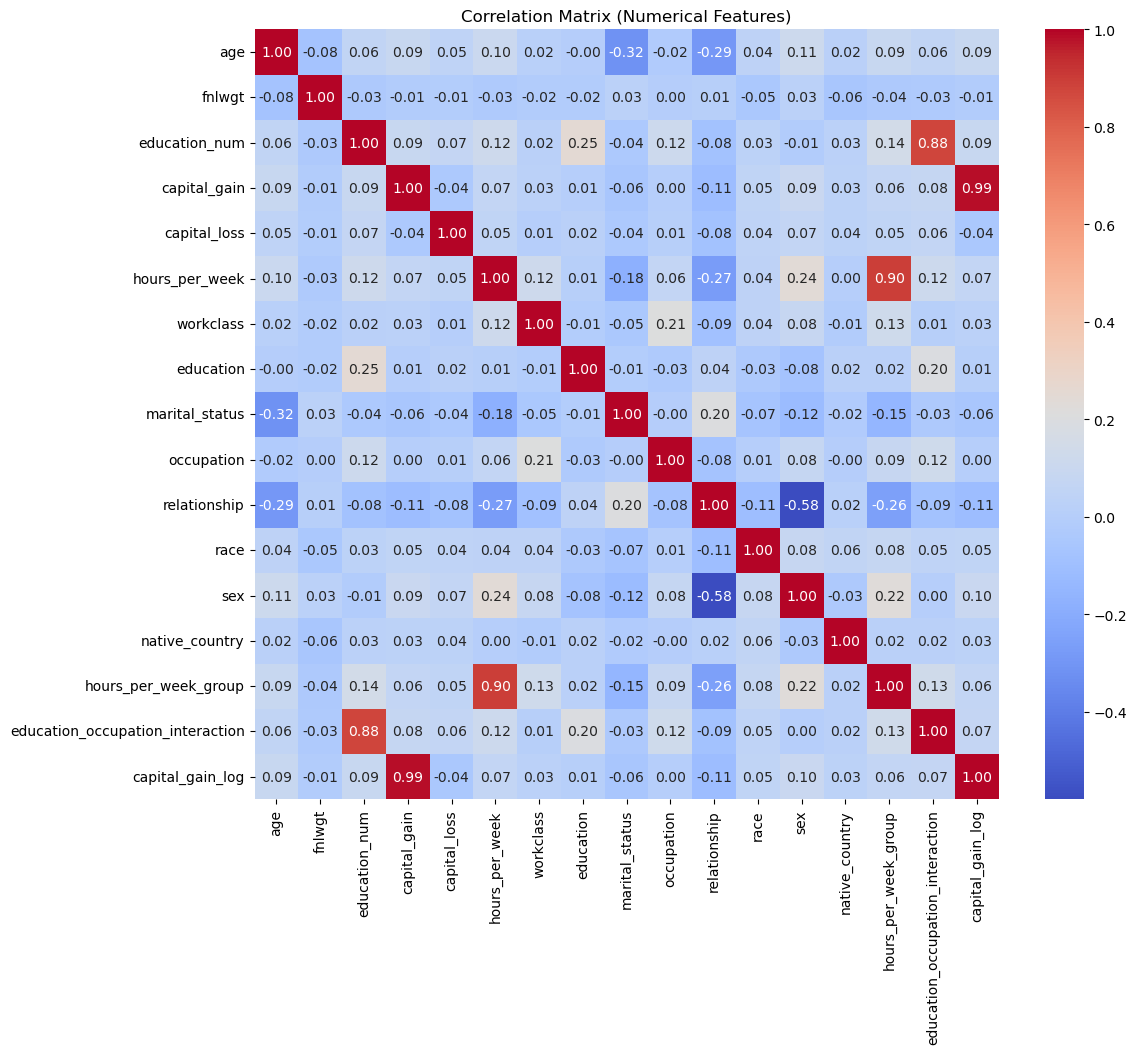

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discuss some key findings from PPS
print("\nDiscussion of PPS findings:")

print("- PPS highlights asymmetric relationships. For instance, 'education_num' might have a high PPS predicting 'occupation', but 'occupation' might have a lower PPS predicting 'education_num'.")
print("- Categorical variables might have high PPS scores predicting numerical variables, which correlation would miss (correlation is primarily for linear relationships between numerical variables).")
print("- PPS can reveal non-linear relationships that correlation cannot detect.")
print("- PPS(A, B) = 0 does not necessarily mean no relationship, but rather that A cannot predict B (e.g., A might be random relative to B).")


numerical_cols_for_corr = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = df_cleaned[numerical_cols_for_corr].corr()

# Visualize the Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

In [58]:
# Compare and contrast the findings
print("\nComparison of PPS and Correlation Matrix findings:")
print("- Correlation measures linear relationships between numerical variables (ranges from -1 to 1). A high absolute correlation indicates a strong linear association.")
print("- PPS measures the predictive power of one variable on another (ranges from 0 to 1). A high PPS indicates that one variable can predict the other well, including non-linear relationships and relationships involving categorical variables.")
print("- PPS can reveal strong relationships between variables that show low or zero correlation (e.g., non-linear patterns, relationships between categorical and numerical features).")
print("- Correlation is symmetric (corr(A, B) = corr(B, A)). PPS is asymmetric (PPS(A, B) != PPS(B, A)), providing insight into directionality of prediction.")
print("- Correlation is sensitive to scale and distribution (e.g., outliers can heavily influence it). PPS is more robust in some cases as it's based on predictive models.")
print("In summary, PPS provides a richer understanding of feature relationships, including non-linear and asymmetric patterns, especially valuable when dealing with mixed data types (numerical and categorical), whereas correlation focuses specifically on linear associations between numerical variables.")


Comparison of PPS and Correlation Matrix findings:
- Correlation measures linear relationships between numerical variables (ranges from -1 to 1). A high absolute correlation indicates a strong linear association.
- PPS measures the predictive power of one variable on another (ranges from 0 to 1). A high PPS indicates that one variable can predict the other well, including non-linear relationships and relationships involving categorical variables.
- PPS can reveal strong relationships between variables that show low or zero correlation (e.g., non-linear patterns, relationships between categorical and numerical features).
- Correlation is symmetric (corr(A, B) = corr(B, A)). PPS is asymmetric (PPS(A, B) != PPS(B, A)), providing insight into directionality of prediction.
- Correlation is sensitive to scale and distribution (e.g., outliers can heavily influence it). PPS is more robust in some cases as it's based on predictive models.
In summary, PPS provides a richer understanding of feat